In [1]:
%load_ext autoreload
%autoreload 2
from src.data_processing import load_data
import itertools
import string

In [2]:
from src.ngrams import *
from src.string_similarity import levenshtein
import operator
from src.data_processing import print_progress
from nltk import word_tokenize, pos_tag
from src.ngrams import get_three_gram_wildcard
from collections import defaultdict

In [3]:
task1, task2, task3, min_pairs, strings, pun_strings = load_data()

In [4]:
with open("data/contractions.json") as f:
    contractions = json.load(f)

In [25]:
tempwords = [t['words'] for t in task1]

In [29]:
word_tokenize(' '.join(tempwords[3]))

['Dentists',
 'don',
 "'",
 't',
 'like',
 'a',
 'hard',
 'day',
 'at',
 'the',
 'orifice',
 '.']

In [7]:
ngram_frequencies = json.load(open("data/ngram_frequencies.json"))
task2_frequencies = [n for i, n in enumerate(ngram_frequencies) if task1[i]['pun']]

In [6]:
def window_compression(threshold):
    count = 0
    target_counts = [0] * len(task2)
    total_ngrams = 0
    for i, trigrams in enumerate(task2_frequencies):
        increment = False
        total_ngrams += len(trigrams)
        for trigram in trigrams:
            if trigram[1] <= threshold:
                target_counts[i] += 1
    #         print(trigram)
            if task2[i]['target'] in trigram[0] and trigram[1] <= threshold:
                increment = True
        count += int(increment)

#     print("Windows containing pun: ", count / len(task2))
#     print("Average continaing ngrams: ", sum(target_counts) / len(task2))
#     print("Average ngrams: ", total_ngrams / len(task2))

    return count / len(task2), sum(target_counts) / len(task2)

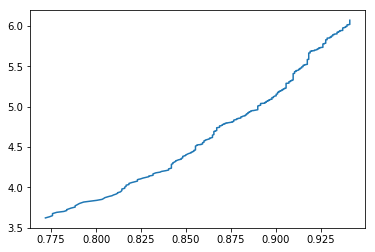

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
cr = [window_compression(i) for i in range(1001)]
plt.plot([c[0] for c in cr], [c[1] for c in cr])

In [ ]:
for i, c in enumerate(task1):
    freqs = []
    context = c['words']
    print_progress(i, len(task1))
    for i in range(1, len(context)-1):
        freqs.append((context[i-1:i+2], three_gram_frequency(context[i-1:i+2])))
    
    three_gram_frequencies.append(freqs)

 |███████████████████████████████████████████████-----------------------------------------------------| 46.8% 

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/doogy/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipyk

In [8]:
test_freqencies = [{'frequencies': t2} for t2 in task2_frequencies]
for i, t in enumerate(task2):
    test_freqencies[i]['text'] = t['words']
    test_freqencies[i]['target'] = t['target']

In [9]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def ngram_search(index):
    context = test_freqencies[index]
    threshold = 0
    res = {}
    print(index)
    pos_text = pos_tag(context['text'], tagset='universal')
    for i, (trigram, freq) in enumerate(context['frequencies']):
        if freq <= threshold and pos_text[i+1][1] in accepted_pos:
            res[(trigram[1], i+1, freq)] = get_three_gram_wildcard(trigram[0], trigram[2])
    return res

In [11]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(ngram_search, range(len(test_freqencies)))

160
80
240
0
161
81
82
162
241
163
242
1
2
3
4
243
83
164
5
6
165
166
7
8
9
10
167
11
12
13
14
244
84
245
246
15
16
17
85
168
169
86
87
88
89
90
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
247
170
171
248
249
250
91
172
173
92
18
19
20
251
252
253
174
254
175
176
177
178
179
21
22
23
255
93
94
95
96
97
180
98
181
182
256
24
99
257
25
26
27
258
259
260
28
183
29
30
31
32
184
185
186
187
33
34
188
189
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
35
190
100
191
101
192
193
194
195
196
197
198
199
200
102
103
261
36
104
105
262
37
38
39
40
106
107
108
201
41
202
203
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
109
204
205
42
263
264
110
111
112
113
206
43
44
265
114
115
45
266
207
116
208
209
46
210
211
47
48
212
117
118
119
213
267
268
269
49
120
121
122
123
214
124
215
216
50
51
52
270
271
272
217
218
273
219
53
54
55
56
57
58
274
220
221
59
275
125
126
222
223
127
128
129
130
131
132
276
277
133
60
134
224
225
226
135
61
62
63
136
137

In [19]:
new_search_space = []
for context in ngram_search_space:
    current = []
    for k, v in context.items():
        current.append((k, v))
    new_search_space.append(current)

In [15]:
with open("data/ngram_search_space.json") as f:
    n = json.load(f)

In [17]:
n[0]

[[['alleged', 13, 0],
  {'Tom Clines .': 54,
   'Tom Keene .': 134,
   'Tom Murray .': 437,
   'Tom away .': 142,
   'Tom Coughlin .': 1498,
   'Tom McNamara .': 82,
   'Tom Baeyens .': 56,
   'Tom Savini .': 4352,
   'Tom Arnold .': 2827,
   'Tom Lazar .': 1162,
   'Tom Day .': 130,
   'Tom Gogola .': 85,
   'Tom Chamberlain .': 112,
   'Tom Hawkins .': 246,
   'Tom Wopat .': 571,
   'Tom Copeland .': 156,
   'Tom Flemming .': 46,
   'Tom Hensley .': 47,
   'Tom Chance .': 162,
   'Tom Barker .': 203,
   'Tom Bair .': 183,
   'Tom Doak .': 196,
   'Tom Rodgers .': 112,
   'Tom Sloper .': 494,
   'Tom Williamson .': 183,
   'Tom Yager .': 272,
   'Tom Vogt .': 87,
   'Tom Cunningham .': 224,
   'Tom Flores .': 99,
   'Tom Siebel .': 244,
   'Tom Cook .': 340,
   'Tom Stoppard .': 3623,
   'Tom Scocca .': 75,
   'Tom McLoughlin .': 176,
   'Tom Spencer .': 219,
   'Tom Derenick .': 41,
   'Tom began .': 129,
   'Tom Rolfe .': 200,
   'Tom Verhoeff .': 123,
   'Tom Stechschulte .': 92,
 

In [22]:
new_search_space[0]

[(('m', 4, 0), {}),
 (('halfway', 5, 0),
  {'m & up': 53,
   "m ' up": 56,
   'm ( up': 983,
   'm ) up': 1850,
   'm , up': 2020,
   'm - up': 1158,
   'm / up': 240,
   'm 2 up': 144,
   'm 3 up': 116,
   'm : up': 2706,
   'm <UNK> up': 188,
   'm = up': 50,
   'm Setting up': 69,
   'm ] up': 54,
   'm ade up': 387,
   'm ake up': 339,
   'm all up': 108,
   'm always up': 379,
   'm and up': 1151,
   'm back up': 117,
   'm breaking up': 49,
   'm building up': 47,
   'm built up': 41,
   'm burning up': 116,
   'm but up': 66,
   'm catching up': 103,
   'm caught up': 268,
   'm cleaning up': 48,
   'm climb up': 54,
   'm coming up': 202,
   'm cracking up': 49,
   'm ends up': 57,
   'm fed up': 778,
   'm finishing up': 160,
   'm following up': 98,
   'm for up': 137,
   'm fucked up': 113,
   'm further up': 107,
   'm gearing up': 78,
   'm getting up': 86,
   'm giving up': 420,
   'm goes up': 97,
   'm going up': 224,
   'm growing up': 58,
   'm grown up': 74,
   'm ha

In [4]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def generate_list(index):
    print(index)
    context = task1[index]
    words = context['words']
    threshold = 0
    res = defaultdict(dict)
    pos_text = pos_tag(words, tagset='universal')
    for i in range(1, len(pos_text)-2):
        if pos_text[i+1][1] not in accepted_pos:
            continue
        original_frequency = ngram_frequency(words[i:i+3])
        if  original_frequency > 10000:
            continue
        try:
            res[' '.join(words[i:i+3])]['original_frequency'] = original_frequency
            res[' '.join(words[i:i+3])]['substitutions'] = get_three_gram_wildcard(words[i], words[i+2])
        except:
            res[' '.join(words[i:i+3])] = "miss"
#     with open("data/ngram_searchspace/{}".format(index), 'w') as f:
#         json.dump(res, f, indent=4)
    return res

In [5]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(generate_list, range(len(task1)))

0
224
336
112
225
226
1
337
2
227
228
229
338
339
340
230
3
113
4
5
341
231
114
6
115
7
232
8
116
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
233
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
342
234
9
343
10
344
11
12
345
117
235
236
237
238
13
239
346
240
14
241
15
242
243
118
16
119
244
347
17
18
120
245
348
246
349
121
350
122
19
123
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
247
20
248
21
351
22
352
124
125
353
354
249
250
355
23
356
24
25
251
26
252
27
28
357
126
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
29
358
30
127
31
128
32
129
130
253
359
254
33
360
34
255
256
131
361
35
132
36
133
37
257
258
362
38
134
259
135
260
39
363
364
40
41
365
136
261
366
42
367
262
43
263
44
368
137
45
264
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
46
369
47
138
139
265
140
141
48
266
49
142
50
267
51
52
268
53
269
143
270
370
Not a path:  /home/doogy/Data/3grams/c1/lower/8/_only.gz
271
144
371
372
145
Not a path:  /

1336
1337
1214
1401
1110
1111
1338
1215
Not a path:  /home/doogy/Data/3grams/c1/lower/’/_only.gz
1339
1340
1402
1216
1112
1217
1341
1218
1342
1403
1343
1404
1113
1456
1405
1406
1407
1114
1219
1220
1115
1116
1457
1117
1221
1222
1408
1409
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1458
Not a path:  /home/doogy/Data/3grams/c1/symbols//.gz
1223
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1459
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1224
1118
1410
1411
1119
1412
1225
1460
1413
1226
1568
1461
1462
1463
1569
1227
1414
1464
1570
1415
1465
1228
1571
1416
1466
1467
1468
1417
1229
1572
1230
1573
1231
1469
1574
1680
1681
1470
1575
1471
1682
1576
1472
1683
1684
1473
1474
1577
1475
1476
1685
1477
1578
1478
1686
1579
1580
1479
1581
1480
1582
1481
1687
1688
1689
1583
1690
1691
1692
1418
1482
1693
1694
1419
1695
1483
1696
1420
1584
1484
1421
1585
1485
1697
1586
1698
1422
1699
1587
1700
1701
1588
1423
1486
1424
1589
1487
1590
1591
1488
1702
1425
1592
1593
1703

In [8]:
with open("data/ngram_searchspace/ngram_totals2.json", 'w') as f:
    json.dump(ngram_search_space, f)

In [6]:
ngram_search_space[0]

defaultdict(dict,
            {"' Tom alleged": {'original_frequency': 0, 'substitutions': {}},
             'I am halfway': {'original_frequency': 5519,
              'substitutions': {"I 'd halfway": 51,
               "I 'm halfway": 20637,
               "I 've halfway": 110,
               'I am halfway': 5519,
               'I are halfway': 116,
               'I arrived halfway': 88,
               'I came halfway': 102,
               'I can halfway': 192,
               'I climbed halfway': 53,
               'I come halfway': 53,
               'I could halfway': 99,
               'I decided halfway': 55,
               'I did halfway': 45,
               'I drove halfway': 103,
               'I even halfway': 46,
               'I feel halfway': 107,
               'I felt halfway': 76,
               'I flew halfway': 95,
               'I get halfway': 671,
               'I go halfway': 760,
               'I got halfway': 3000,
               'I had halfway': 121,
   